In [ ]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

In [2]:
BGM_df = pd.read_csv('final_df_BGM.csv')

X = BGM_df.drop(columns=["madness", "year"]) #.values 
y = BGM_df['madness'] #.values

## Обрабатываем датасет

In [3]:
X.head()

,"(51, 49, 49)","(120, 117, 105)","(187, 163, 128)","(128, 79, 53)","(215, 208, 198)","(21, 21, 23)","(54, 73, 93)",R1,G1,B1,...,R7,G7,B7,Count7,count,line_length,straight_lines_count,straight_lines_length,circle_count,normalized_radius_sum
0,11094,641,1790,184,357,11059,1324,41,56,62,...,93,81,74,1882,2,0.078886,0.000772,19098.320525,151,0.041514
1,326,874,3297,1320,765,133,16,178,147,117,...,56,43,46,521,1,0.058533,0.000225,4216.292051,127,0.046067
2,6859,719,192,120,372,2239,439,66,72,64,...,84,59,43,350,1,0.150776,0.001736,41927.182386,176,0.047528
3,5679,419,1154,591,29,4666,473,44,50,53,...,121,77,57,299,1,0.141838,0.001411,36577.024363,130,0.047107
4,2894,483,476,1456,23,1693,16,65,61,53,...,143,83,37,767,1,0.120445,0.000980,22464.292472,193,0.046078


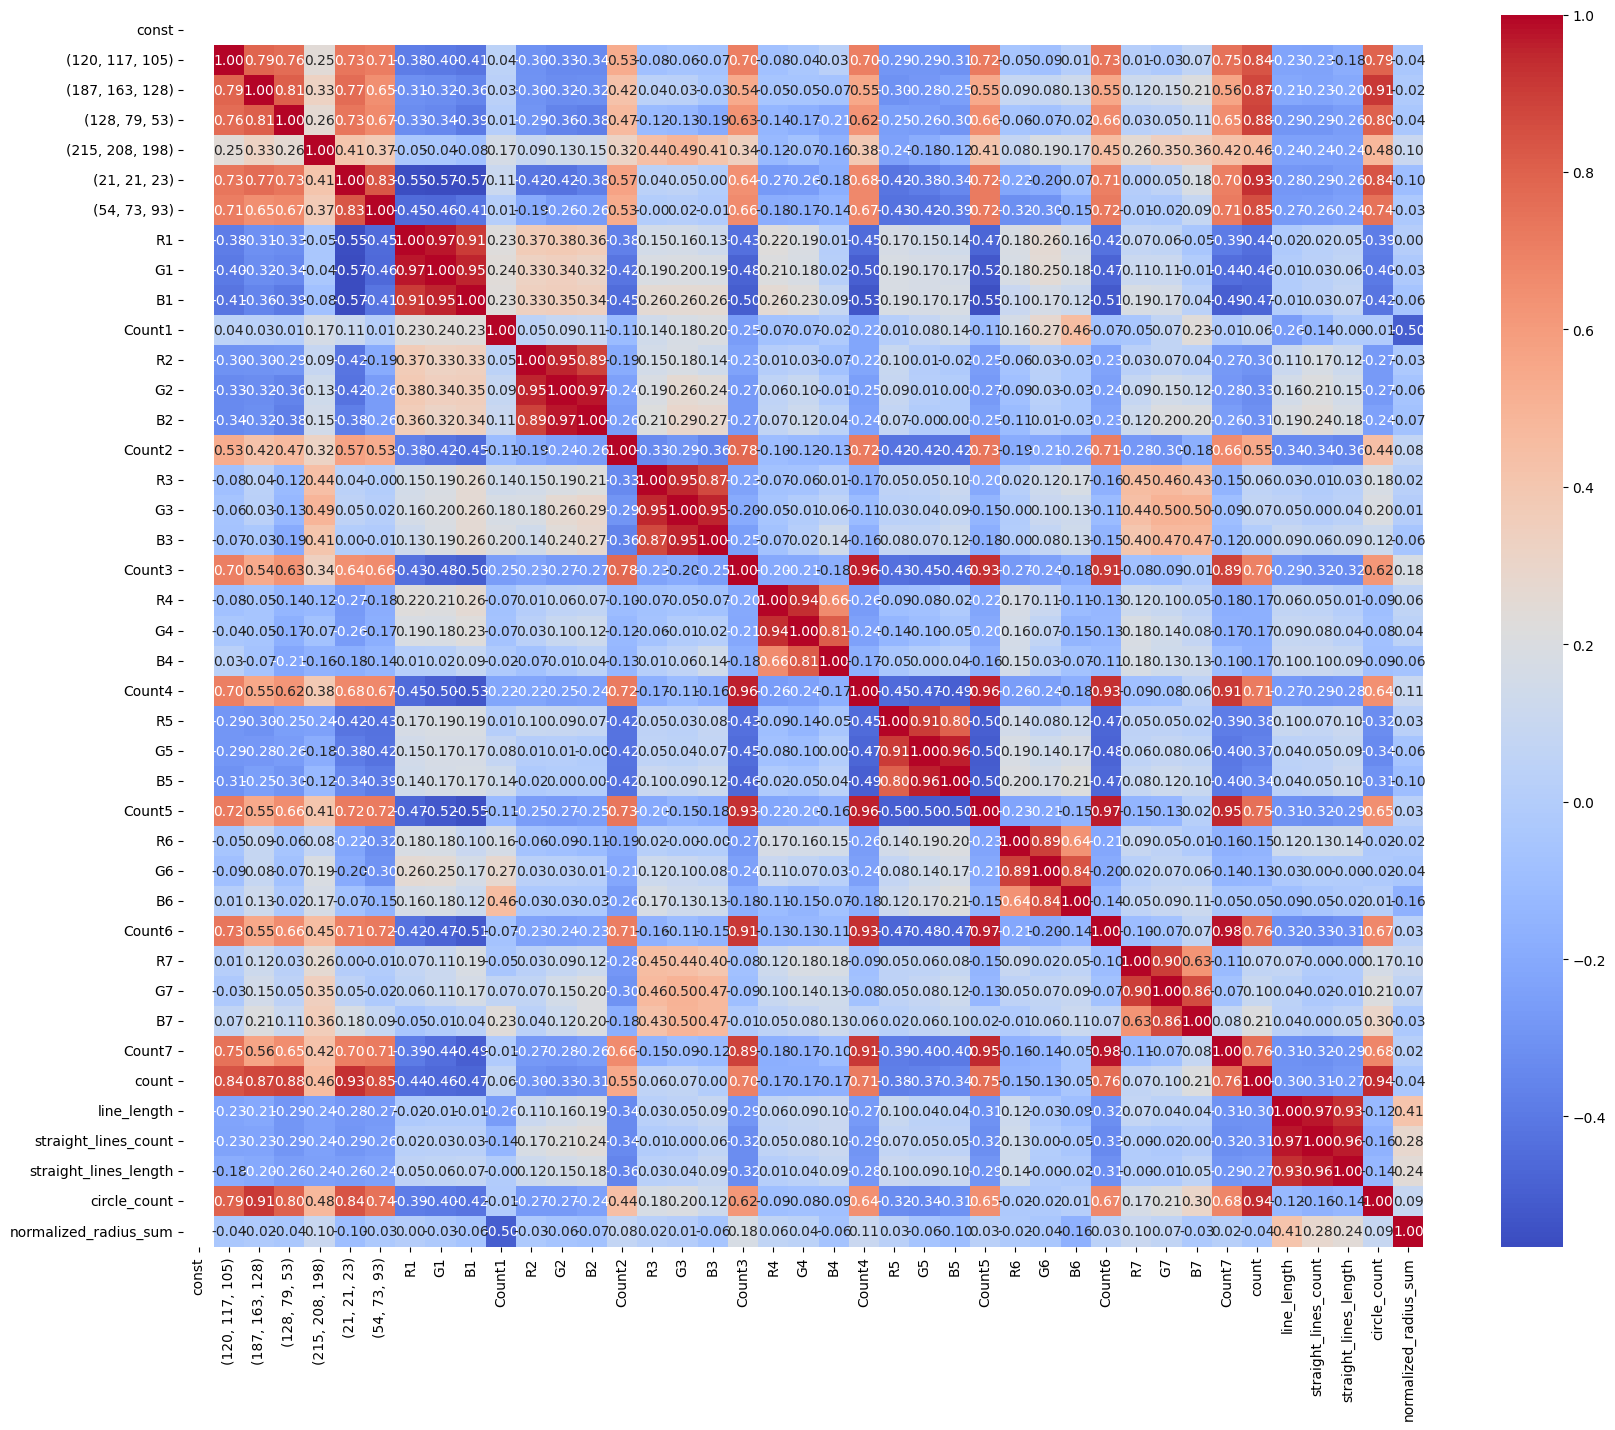

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# добавление константы для перехвата
X = add_constant(X.drop('(51, 49, 49)', axis=1))

# расчет VIF для каждого предиктора
VIFs = pd.DataFrame()
VIFs['Variable'] = X.columns
VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIFs)

                 Variable          VIF
0                   const  2262.248249
1         (120, 117, 105)    36.447861
2         (187, 163, 128)    21.638417
3           (128, 79, 53)    82.229424
4         (215, 208, 198)    17.605537
5            (21, 21, 23)   148.149128
6            (54, 73, 93)    20.414645
7                      R1   113.804828
8                      G1   312.874461
9                      B1    88.949175
10                 Count1    13.500422
11                     R2    75.181204
12                     G2   324.145450
13                     B2   167.703948
14                 Count2    38.865023
15                     R3    78.211782
16                     G3   436.155514
17                     B3   178.222471
18                 Count3   159.126083
19                     R4    52.178497
20                     G4    88.204625
21                     B4    16.017538
22                 Count4   274.400291
23                     R5    46.953017
24                     G5

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

In [7]:
vif_info = calculate_vif(X)
# vif_info
high_vif = vif_info[vif_info['VIF'] > 100]  # порог
# high_vif
X = X.drop(columns=high_vif['feature'])

In [8]:
high_vif['feature']

0              (51, 49, 49)
3             (128, 79, 53)
5              (21, 21, 23)
7                        R1
8                        G1
9                        B1
10                   Count1
11                       R2
12                       G2
13                       B2
14                   Count2
15                       R3
16                       G3
17                       B3
18                   Count3
19                       R4
20                       G4
22                   Count4
23                       R5
24                       G5
25                       B5
26                   Count5
27                       R6
28                       G6
29                       B6
30                   Count6
31                       R7
32                       G7
33                       B7
34                   Count7
35                    count
36              line_length
37     straight_lines_count
38    straight_lines_length
39             circle_count
40    normalized_rad

In [9]:
# X = X.drop(columns=['Count1'])
# X.head()

In [10]:
# X = X.drop(columns=high_vif['feature'])

In [11]:
X.head()

,"(120, 117, 105)","(187, 163, 128)","(215, 208, 198)","(54, 73, 93)",B4
0,641,1790,357,1324,72
1,874,3297,765,16,123
2,719,192,372,439,142
3,419,1154,29,473,19
4,483,476,23,16,99


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # PCA -> становится хуже
# pca = PCA(n_components=0.95)  # сохранить 95% дисперсии
# X_pca = pca.fit_transform(X_scaled)

In [13]:
X = X_scaled
# X = X_pca

## Линейная регрессия

### Scikit-learn

In [14]:
# class MyLinearRegression:
#     def __init__(self):
#         self.coef_ = None
#         self.intercept_ = None

#     def fit(self, X, y):
#         # Добавим столбец единиц (bias trick)
#         X_b = np.c_[np.ones((X.shape[0], 1)), X]
#         # Метод нормальных уравнений
#         theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
#         # theta_best = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y # mse стал 1.2934...
#         self.intercept_ = theta_best[0]
#         self.coef_ = theta_best[1:]

#     def predict(self, X):
#         return X @ self.coef_ + self.intercept_

In [15]:
from sklearn.preprocessing import StandardScaler

class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.scaler = StandardScaler()

    def fit(self, X, y):
        # Масштабируем X
        X_scaled = self.scaler.fit_transform(X)
        X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
        theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        # theta_best = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y # псевдообратная матрица - mse стал 1.2934...
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        return X_scaled @ self.coef_ + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - u/v

In [16]:
# class MyLinearRegression:
#     def __init__(self, lr=0.01, n_iter=1000):
#         self.lr = lr
#         self.n_iter = n_iter
#         self.loss_history = []

#     def fit(self, X, y):
#         X = np.c_[np.ones(X.shape[0]), X]  # добавляем константу
#         self.theta = np.zeros(X.shape[1])

#         for _ in range(self.n_iter):
#             y_pred = X @ self.theta
#             error = y_pred - y
#             loss = (1 / len(y)) * np.sum(error ** 2)
#             self.loss_history.append(loss)
#             gradient = (2 / len(y)) * (X.T @ error)
#             self.theta -= self.lr * gradient

#     def predict(self, X):
#         X = np.c_[np.ones(X.shape[0]), X]
#         return X @ self.theta

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [18]:
model = MyLinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE на тестовой выборке:", mse)

r2 = model.score(X_test, y_test)
print(f"Коэффициент детерминации (R^2): {r2}")

mae = np.mean(np.abs(y_test - y_pred))
print("MAE на тестовой выборке:", mae)

MSE на тестовой выборке: 0.06633852494634013
Коэффициент детерминации (R^2): 0.24587472943438948
MAE на тестовой выборке: 0.21298563216483957


In [21]:
import statsmodels.api as sm

# Добавляем константу (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                madness   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2.640
Date:                Wed, 09 Apr 2025   Prob (F-statistic):             0.0362
Time:                        20:03:23   Log-Likelihood:                -2.0780
No. Observations:                  49   AIC:                             16.16
Df Residuals:                      43   BIC:                             27.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5102      0.038     13.252      0.0

In [22]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

X = sm.add_constant(X)  # Добавляем столбец единиц для интерсепта
model = sm.OLS(y, X).fit()

# Вычисление теста Дарбина-Уотсона
dw_stat = durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw_stat) # Если статистика близка к 2, то автокорреляции нет

Durbin-Watson statistic: 0.4372888207107


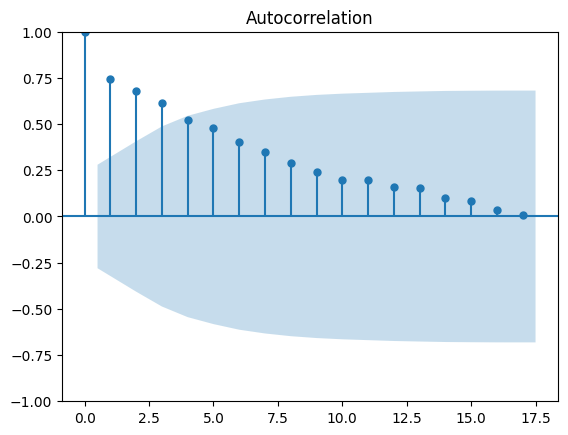

In [23]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# График автокорреляции остатков
plot_acf(model.resid)
plt.show()

Регрессия из sklearn

Train R²: 0.22429835486519734
Test R²: 0.24587472943438948
MAE: 0.21298563216483957
MSE: 0.06633852494634013


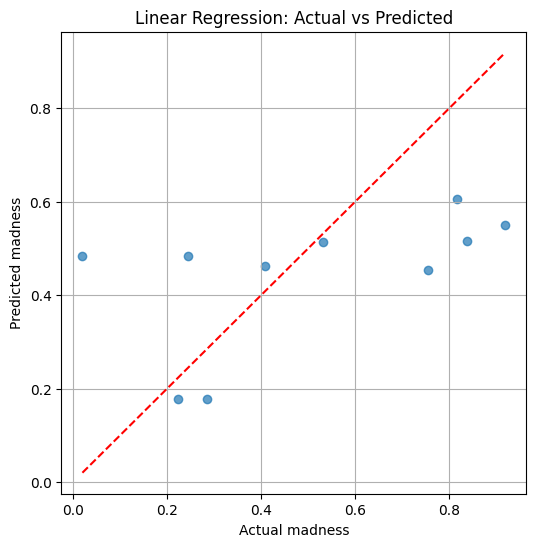

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual madness")
plt.ylabel("Predicted madness")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [25]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [26]:
ridge_r2 = ridge.score(X_test, y_test)
print(f"Коэффициент детерминации (R^2) для Ridge: {ridge_r2}")

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("Ridge MAE:", mae_ridge)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge MSE:", mse_ridge)

Коэффициент детерминации (R^2) для Ridge: 0.24904305736943633
Ridge MAE: 0.21046112327361732
Ridge MSE: 0.06605981501582732


In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [28]:
lasso_r2 = lasso.score(X_test, y_test)
print(f"Коэффициент детерминации (R^2) для Lasso: {lasso_r2}")

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Ridge MAE:", mae_lasso)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Ridge MSE:", mse_lasso)

Коэффициент детерминации (R^2) для Lasso: -0.0006726528380149865
Ridge MAE: 0.26734693877551025
Ridge MSE: 0.08802668513365981


In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Средняя ошибка на кросс-валидации: {-scores.mean()}")

Средняя ошибка на кросс-валидации: 0.1713547554797595


### Pytorch

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

In [31]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_sub_tensor = torch.tensor(X_train_sub, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_sub_tensor = torch.tensor(y_train_sub.values, dtype=torch.float32).reshape(-1, 1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

In [32]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

In [33]:
# class LinearModel(nn.Module):
#     def __init__(self, input_dim):
#         super(LinearModel, self).__init__()
#         self.linear = nn.Linear(input_dim, 1)
    
#     def forward(self, x):
#         return self.linear(x)

class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(LinearModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.layer3 = nn.Linear(hidden_dim // 2, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)  # Регуляризация
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.layer3(x)
        return x

In [34]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

model = LinearModel(X_train.shape[1], hidden_dim=64)
model.apply(init_weights)

LinearModel(
  (layer1): Linear(in_features=5, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

In [35]:
model = LinearModel(X_train.shape[1])
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2-регуляризация
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=50)

In [36]:
class EarlyStopping:
    def __init__(self, patience=100, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

In [37]:
from tqdm import tqdm   

# num_epochs = 1000
# for epoch in tqdm(range(num_epochs)):
#     model.train()
#     optimizer.zero_grad()
#     outputs = model(X_train_tensor)
#     loss = criterion(outputs, y_train_tensor)
#     loss.backward()
#     optimizer.step()
#     if (epoch + 1) % 100 == 0:
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

train_losses = []  # Список для хранения тренировочных потерь
val_losses = []   # Список для хранения валидационных потерь
early_stopping = EarlyStopping(patience=100)
num_epochs = 5000
for epoch in tqdm(range(num_epochs)):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_sub_tensor)
    loss = criterion(outputs, y_train_sub_tensor)
    loss.backward()
    optimizer.step()
    
    # Валидация
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    scheduler.step(val_loss)
    early_stopping(val_loss)
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
    
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

  6%|▌         | 284/5000 [00:00<00:06, 767.01it/s]

Epoch [100/5000], Train Loss: 0.0666, Val Loss: 0.0618
Epoch [200/5000], Train Loss: 0.0587, Val Loss: 0.0610
Early stopping triggered


In [38]:
# # model.eval()
# # with torch.no_grad():
# #     y_pred_tensor = model(X_test_tensor)
# #     y_pred = y_pred_tensor.numpy()

# model.eval()
# with torch.no_grad():
#     y_pred_tensor = model(X_test_tensor)
#     y_pred = y_pred_tensor.numpy()


In [39]:
print("PyTorch R²:", r2_score(y_test, y_pred))
print("PyTorch MAE:", mean_absolute_error(y_test, y_pred))
print("PyTorch MSE:", mean_squared_error(y_test, y_pred))

PyTorch R²: 0.24587472943438948
PyTorch MAE: 0.21298563216483957
PyTorch MSE: 0.06633852494634013


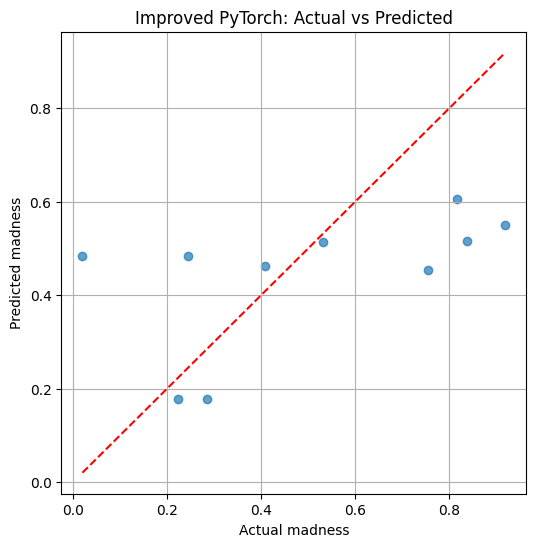

In [40]:
# Визуализация
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual madness")
plt.ylabel("Predicted madness")
plt.title("Improved PyTorch: Actual vs Predicted")
plt.grid(True)
plt.show()

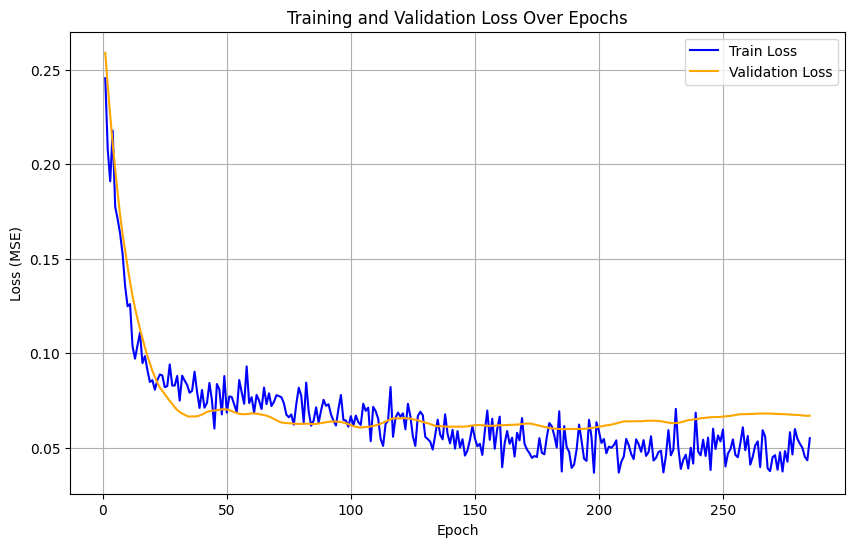

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()